# Статистическая значимость

Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами — насколько статистически значимы полученные нами результаты.

Чтобы ответить на этот вопрос, нужно понять, какие ошибки мы можем допустить при проверке гипотез, а также познакомиться с понятием статистической значимости (p-value).

## ОШИБКИ I И II РОДА

При проверке гипотезы возможно допустить ошибку одного из двух видов:

- ***Ошибка I (первого) рода***: отклонение нулевой гипотезы, когда она на самом деле верна. Эта ошибка также называется α - ***ошибкой***, или ***ложноположительным*** результатом.
- ***Ошибка II (второго) рода***: неотклонение нулевой гипотезы, когда она на самом деле ложна. Эта ошибка также называется β - ***ошибкой***, или ***ложноотрицательным*** результатом.

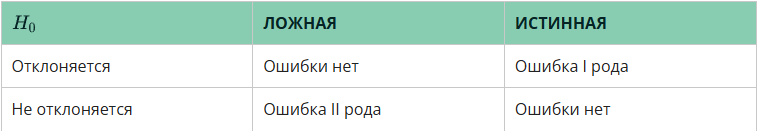

В примере про предварительную проверку рекомендательной системы на выборке покупателей ошибками первого и второго рода будут следующие ситуации:

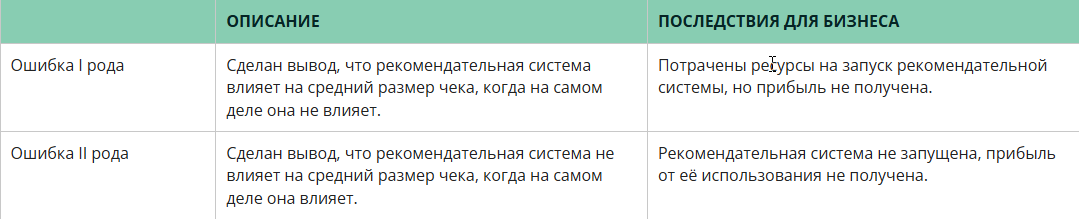

Как вы понимаете, каждая из ошибок при проверке гипотезы может привести к определённым последствиям, которые важно учитывать при проведении тестирования гипотез.

***Примечание***. Вероятность не допустить ошибку II рода (1 - β) ещё называют ***мощностью теста***. Например, если мощность теста составила 0.93, это значит, что вероятность того, что была допущена ошибка II рода, составляет 0.07 (7 %).

***Примечание***. Ошибки первого и второго рода — предмет активных исследований дата-сайентистов при решении задач классификации, когда необходимо оценить качество алгоритма.

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. Например, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» (класс 0) и «подозрительные/мошеннические» (класс 1), то этот алгоритм может:

Отнести образец к классу 1, когда он на самом деле относится к классу 0. То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. Это ошибка первого рода.
Не отнести образец к классу 1, когда он на самом деле относится к классу 1. То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. Это ошибка второго рода.
Данные, размеченные на два класса, используют в специальных алгоритмах машинного обучения, чтобы сформировать предсказания на новых данных. Подробнее об этом вы узнаете в модулях по машинному обучению.

### Задание 4.1

Исследуя новое лекарство, мы сделали вывод, что оно уменьшает время выздоровления пациентов.

Пусть  — среднее время выздоровления пациентов до приёма лекарства, а  — после его приёма. Нулевая и альтернативная гипотезы состояли в следующем:

- H1: μ1 <= μ2  — время выздоровления пациентов после приёма лекарства не изменилось или увеличилось.
- H1: μ1 > μ2 — время выздоровления пациентов после приёма лекарства уменьшилось.
Однако, выпустив лекарство на рынок, мы поняли, что время выздоровления пациентов не уменьшилось.

Ошибку какого рода мы допустили?

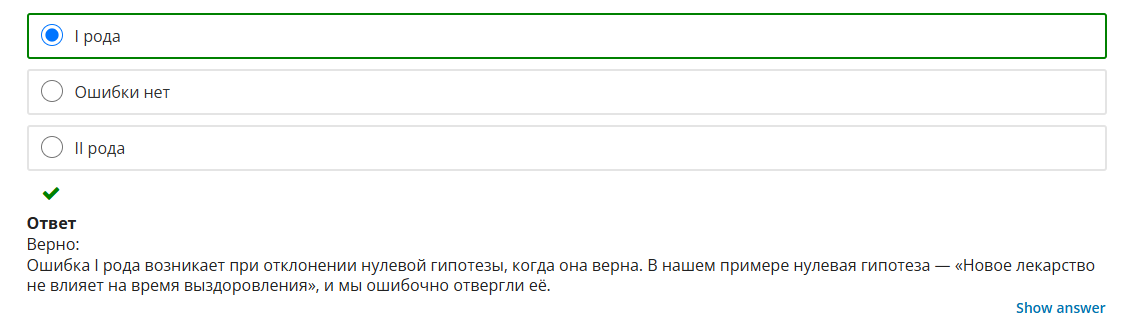

### Задание 4.2 (на самопроверку)

Для приведённых ниже бизнес-вопросов самостоятельно сформулируйте нулевую и альтернативную гипотезы, а также смысл ошибок первого и второго рода:

Уменьшается ли время ответа техподдержки благодаря использованию нового классификатора запросов?
Увеличивается ли время работы изделий при использовании материалов от нового поставщика?

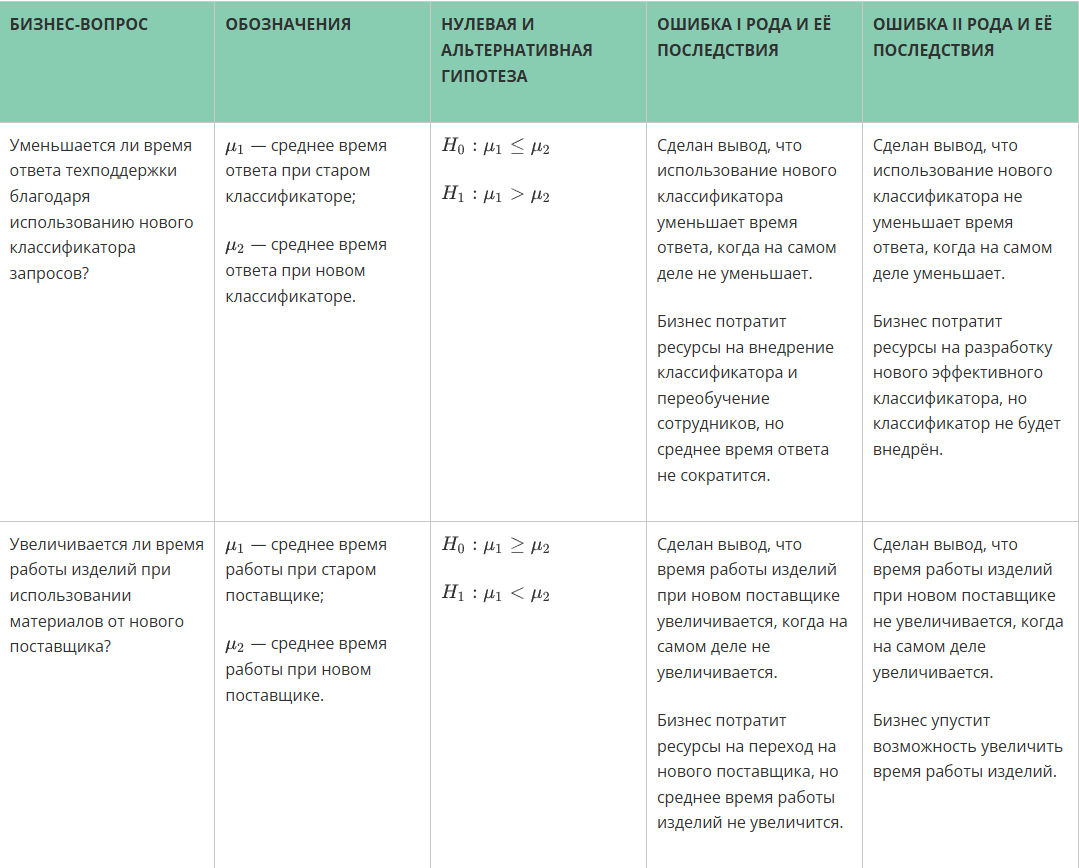

## СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (P-VALUE)

Мы разобрались, что может пойти не так при проверке гипотезы. Вернёмся к понятию статистической значимости.

Для визуализации идеи статистической значимости мы будем использовать график плотности распределения вероятности, а именно график оценки плотности ядра (Kernel Density Estimation, KDE). Он представляет собой непрерывную кривую, которая показывает распределение значений, и выглядит как сглаженная гистограмма. По такому графику проще понять форму распределения (пики, симметричность), чем по гистограмме.

По оси X отложено значение случайной величины (например, размера чека), а по оси  — плотность вероятности (чем больше y, тем больше вероятность наблюдать значение по оси X). [Детали построения графиков плотности вероятностей](https://kb.fastpanel.direct/troubleshoot/).

Примеры графиков плотности распределения вероятности (оранжевые) с соответствующими гистограммами:

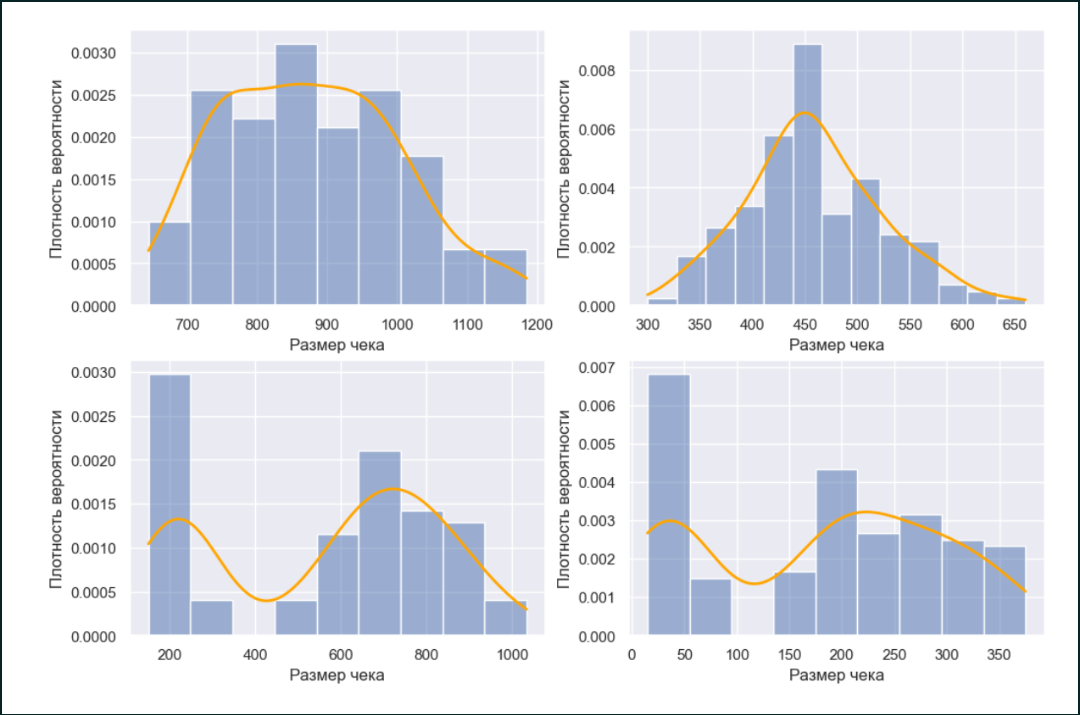

График плотности вероятности построен так, что вся площадь под кривой равна 1 — это вероятность всех возможных значений размера чека. Это следует из основного правила теории вероятностей: сумма вероятностей всех исходов (всех возможных значений чека) всегда равна 1.

Площадь под кривой на интервале от a до b (голубая область) соответствует вероятности получить среднее значение от  до  (на графике ниже такая вероятность ~0.3 ):

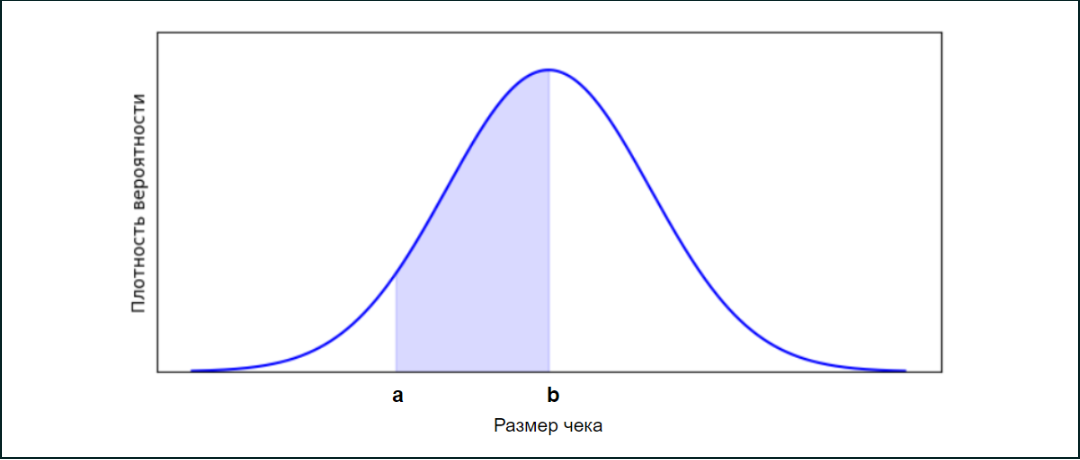

Например, если a = 350, а b=500 , это значит, что вероятность того, что средний чек покупки в онлайн-магазине находится в диапазоне от 350 до 500 рублей составляет 0.3.

Теперь мы, наконец, готовы ввести понятие ***p-value.***

Уровнем ***статистической значимости*** (*p-value*, p-значением) называется вероятность получить наблюдаемые или более экстремальные значения при условии, что нулевая гипотеза верна.

Рассмотрим это определение на примере ответа на вопрос «Средний чек покупки в онлайн-магазине больше 500 рублей?». Гипотезы будут следующими:

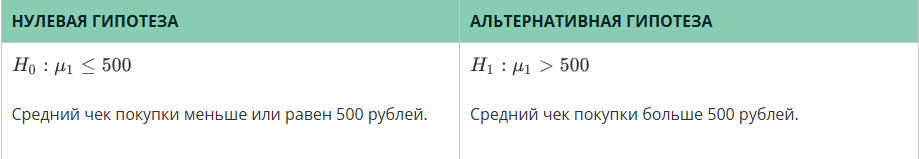

Сначала допустим, что верна нулевая гипотеза: средний чек покупки (на генеральной совокупности) меньше или равен 500 рублей.

Нам неизвестно, какой будет истинная форма плотности вероятности чека, которая получается на основе генеральной совокупности. Обычно предполагают какую-то форму из стандартных законов распределений, например, из нормального закона распределения, как на графике ниже (о нормальном распределении и его свойствах мы поговорим далее). Синяя пунктирная линия соответствует среднему чеку в 500 рублей, вокруг которого мы строим нулевую гипотезу:

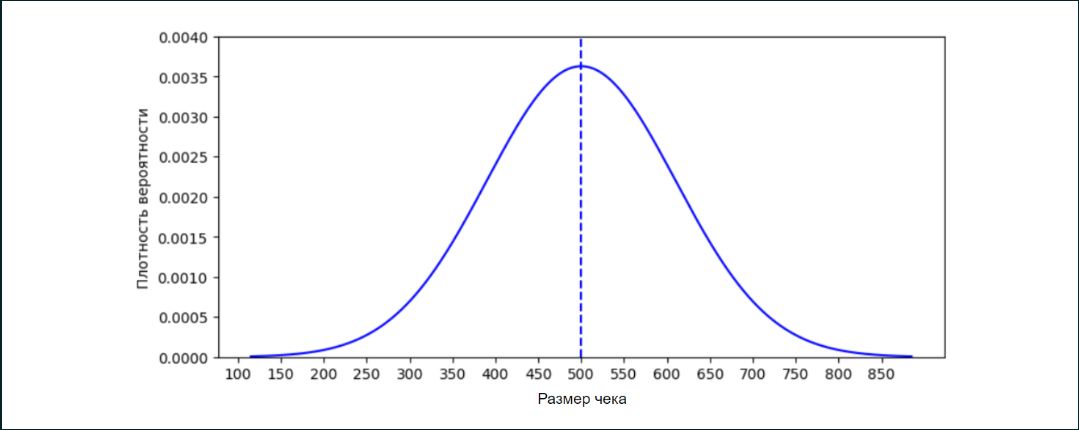

Пусть на выборке мы получили средний размер чека 700 рублей. Отметим это значение на графике:

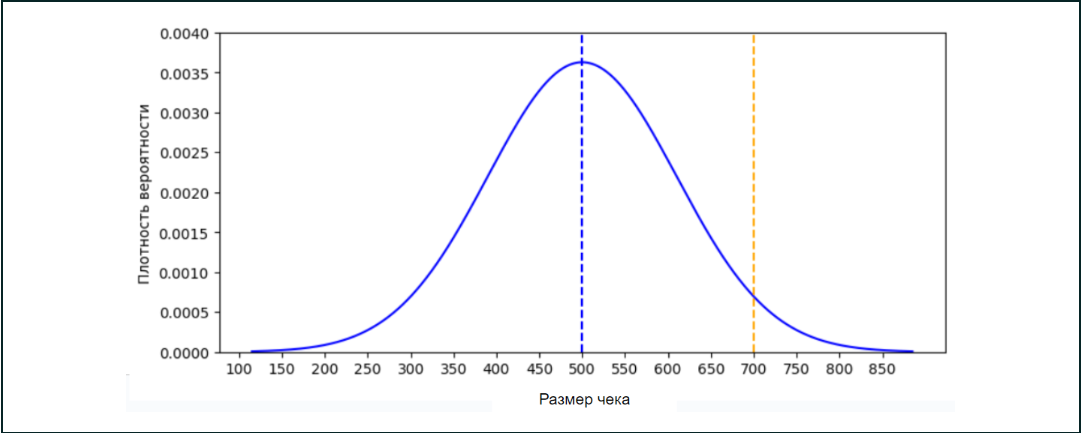

Какова вероятность получить такой же (700 рублей) или ещё больший средний чек при условии, что средний чек равен 500 рублям? Этой вероятностью будет площадь под кривой от 700 к большим значениям (*p-value* = p):

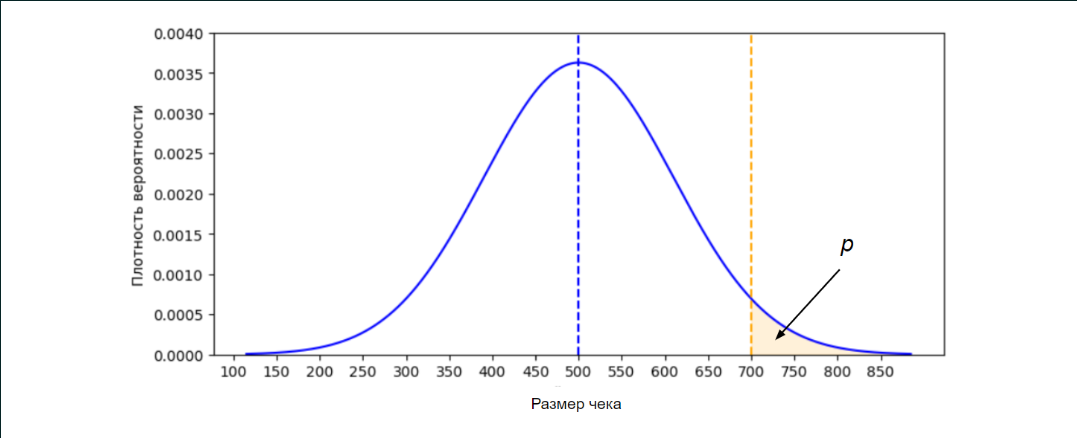

Чем больше было бы число, которое мы получили на выборке:

- тем меньше была бы площадь под кривой, т. е. меньше полученное значение p-value;
- тем меньше полученное наблюдение соответствовало бы нулевой гипотезе, согласно которой среднее значение чека — 500 рублей или меньше.

Важно понимать, что *p-value* — это именно вероятность получить наблюдаемые или более экстремальные значения, если верна нулевая гипотеза, а не вероятность верности нулевой гипотезы.

Следующее необходимое нам понятие — уровень значимости.

***Уровень значимости*** — это пороговая вероятность допустить ошибку I рода (вероятность отклонить нулевую гипотезу, когда она верна). Обычно это число обозначается за α.

Если полученное значение p-value меньше заранее заданного уровня значимости , мы отвергаем нулевую гипотезу. В таком случае принято говорить, что мы обнаружили статистически значимый эффект. Чаще всего в бизнесе берут α = 0.05. Это означает, что мы готовы к 5 % риску допустить ошибку I-ого рода (то есть сделать вывод, что эффект есть, хотя на самом деле его нет).

Итак:

Если полученное *p-value* ***ниже уровня значимости*** (ρ < α), результаты статистически значимы и согласуются с альтернативной гипотезой.
Если полученное *p-value* ***выше уровня значимости*** (ρ > α), результаты считаются статистически незначимыми, нельзя отвергнуть нулевую гипотезу.

***Примечание***. Если *p-value* равно уровню значимости (ρ = α), то возникает дилемма: принять нулевую гипотезу или отвергнуть её в зависимости от предварительных условий. На практике, если не оговорено других предварительных условий, в большинстве случаев нулевую гипотезу отвергают, если ρ <= α.

Иллюстрация принятия решения для проверки гипотезы:

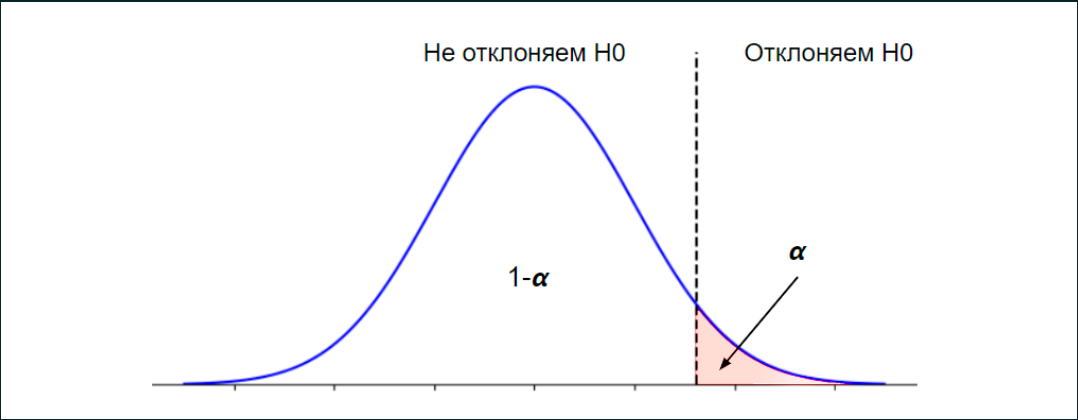

***Примечание***. Раньше специалисты по статистике вручную рассчитывали *p-value* по измеренным данным и анализировали результаты по специальным справочникам с таблицами распределения. Теперь мы можем просто воспользоваться готовыми функциями из библиотек *SciPy* и *Statsmodels* для языка *Python*. Эти функции мы ещё разберём далее в модуле, а в этом юните опустим детали получения *p-value*.

В нашем примере p-value = 0.03 (пока мы опустили детали вычисления). Это означает, что, если нулевая гипотеза верна, вероятность получить на выборке чек, который больше среднего чека на 200 и более рублей, составляет 0.03. Иллюстрация выглядит так:

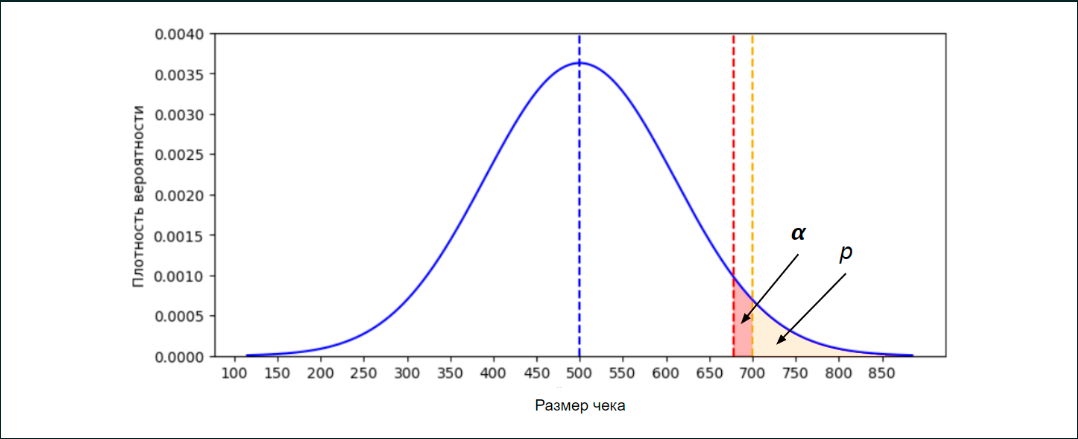

Площадь жёлтой области равняется p-value (0.03), площадь красной области равняется  (0.05). P-value меньше  — значит, мы можем отвергнуть нулевую гипотезу в пользу альтернативной и сказать, что средний чек покупки больше 500 рублей.

Давайте потренируемся в принятии решений.

### Задание 4.3

Какие утверждения были бы верными, если бы в описанном выше примере p-value равнялось 0.2, а остальные условия были такими же?

Напомним нулевую и альтернативную гипотезы:

- H1: μ1 <= 500 — средний чек покупки меньше или равен 500 рублям.
- H1: μ1 > 500 — средний чек покупки больше 500 рублей.

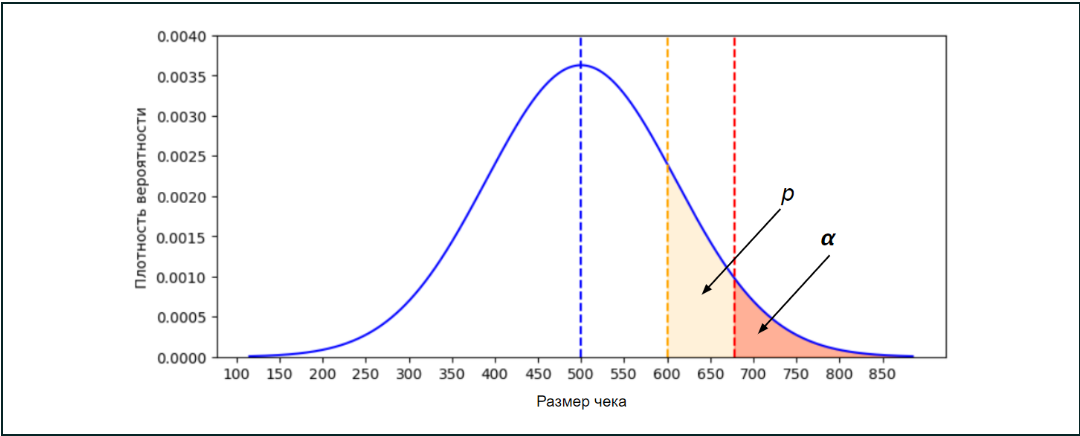

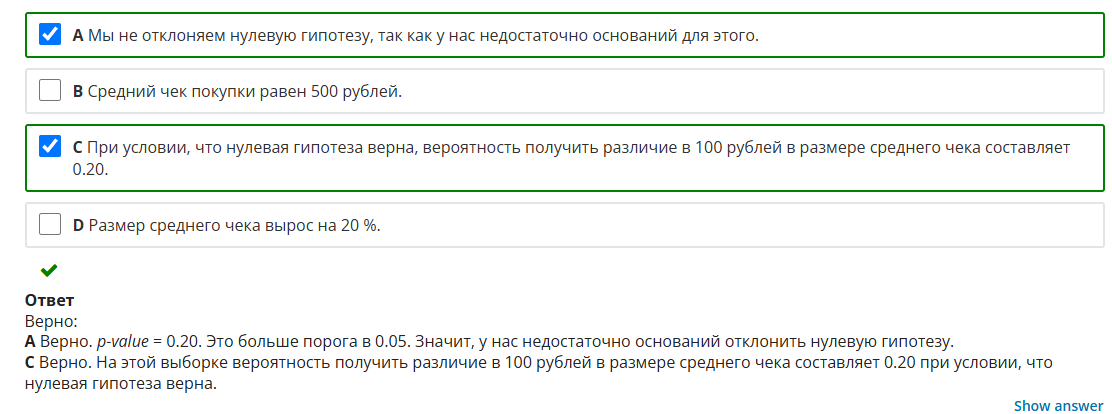

##  α ПРИ ОДНОСТОРОННИХ И ДВУСТОРОННИХ ГИПОТЕЗАХ

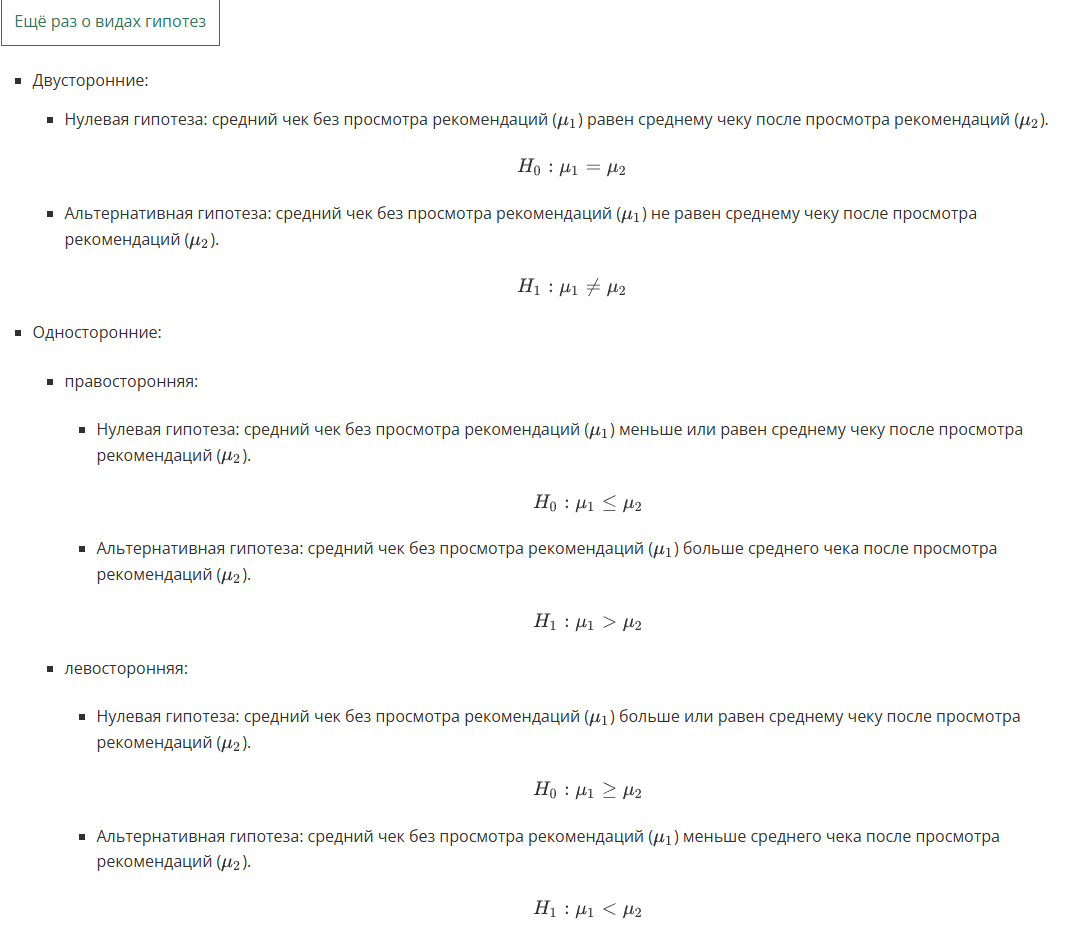

Выше мы приводили иллюстрацию принятия решения для проверки односторонней (правосторонней) гипотезы:

одна область отклонения нулевой гипотезы (справа);
площадь области = α.
Аналогичная иллюстрация для левосторонней гипотезы:

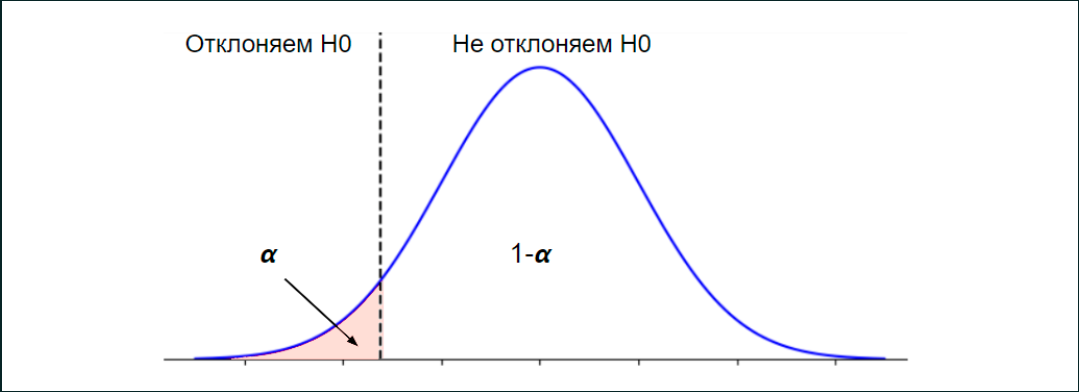

Для двусторонней гипотезы иллюстрация будет следующей:

- две области отклонения нулевой гипотезы (справа и слева);
- площадь каждой области = α/2.

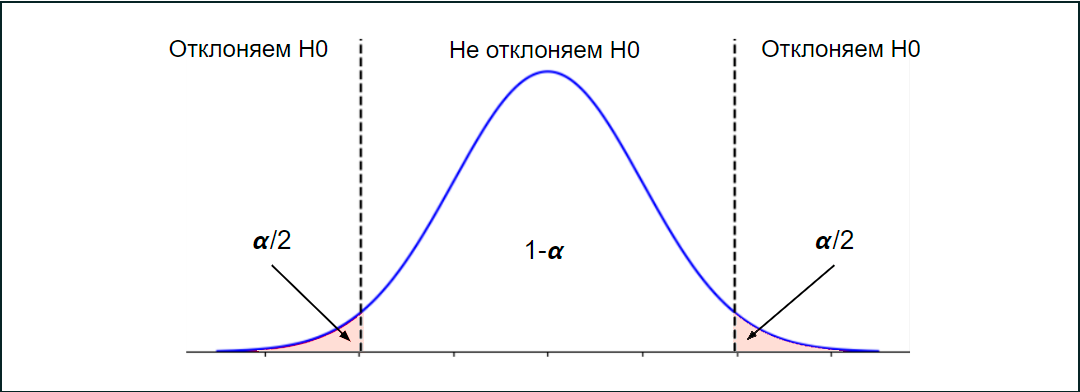

Получается, что мы отвергаем двустороннюю гипотезу при более несовместимых с нулевой гипотезой данных, так как смотрим на различия в обе стороны — и в большую, и в меньшую. В каждой из сторон мы смотрим на более экстремальные значения, чем при односторонних гипотезах

## КАК ВЫБРАТЬ α?

Уровень значимости  используют как порог для принятия решений, задающий приемлемый уровень ошибки I рода. Например,  = 0.05 означает, что мы готовы к риску в 5 % случаев сделать вывод о существовании искомого эффекта, когда в реальности его нет.

Значение  необходимо выбрать до начала исследования совместно с бизнес-заказчиком. Единственно верного значения  не существует — оно зависит от бизнес-задачи. Обычно выбирают 0.01, 0.05 или 0.10.

Примечание. При решении задач в этом модуле мы всегда будем использовать уровень значимости α = 0.05.

Иллюстрация соотношения наиболее популярных значений α:

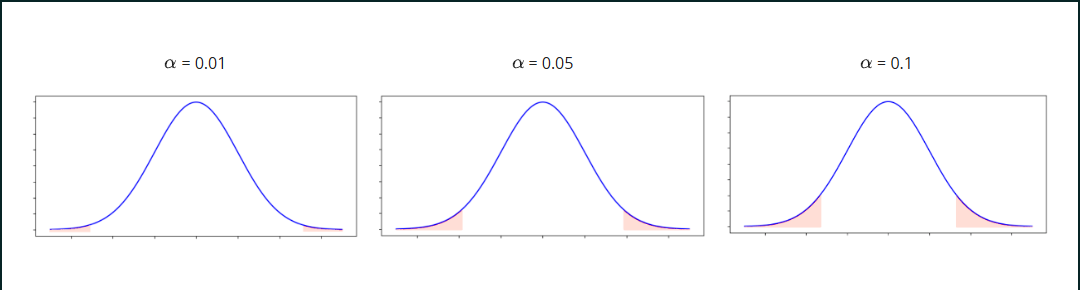

Чем более нежелательно допустить ошибку I рода, тем меньшее значение α стоит выбирать. Например, уровень значимости при испытаниях нового автомобильного оборудования будет ниже, чем уровень значимости при исследовании новой версии сайта.

Возникает вполне логичный вопрос: почему бы не принять α = 0, тем самым исключив возможность ошибки?

Увы, всё не так просто. Дело в том, что, помимо α, мы должны учитывать и β — вероятность ошибки II рода (риск ложноотрицательного результата). Две этих величины противоречат друг другу. Предположим, вы хотите минимизировать ошибку первого рода. Тогда можно всегда принимать нулевую гипотезу H0 вне зависимости от наблюдаемых данных — ошибки I рода не случится. Однако такое решение будет поднимать вероятность ошибки II рода (ошибки принятия нулевой гипотезы, когда она на самом деле ложна). Компромисс между этими параметрами показан ниже.

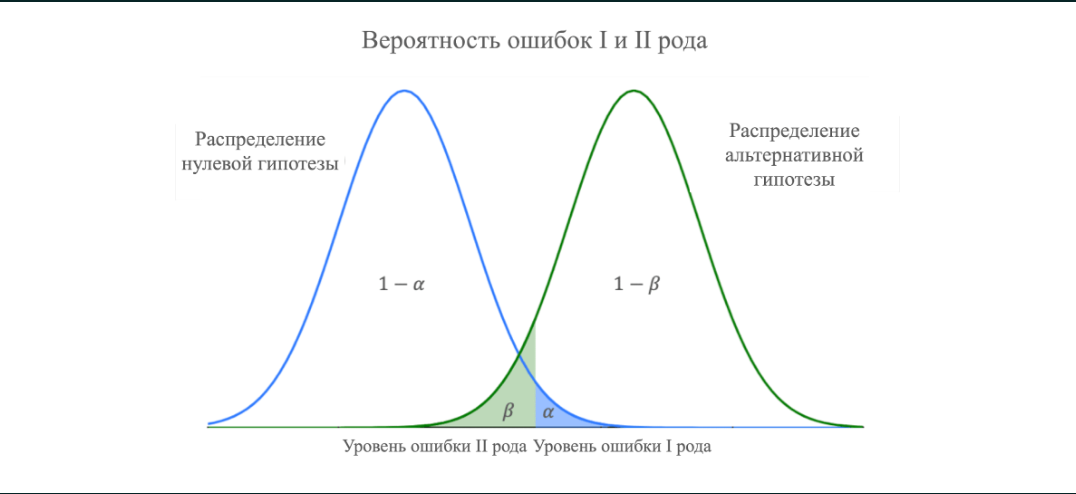

На рисунке выше мы видим две кривые: синим показана вероятность получить наблюдаемые данные, если верна нулевая гипотеза; зелёным — вероятность получить их, если верна альтернативная гипотеза. Ошибки I и II рода возникают там, где эти два распределения перекрываются. Например, в точке пересечения зелёной и синей линий вероятности получить наблюдаемые данные равны — выбрать между гипотезами будет затруднительно.

Область, заштрихованная синим цветом, представляет собой α — вероятность ошибки I рода, а область, заштрихованная зелёным цветом — β, вероятность ошибки II рода. Установив частоту ошибок I рода, вы также косвенно влияете на частоту ошибок II рода.

В этом юните мы познакомились с понятием статистической значимости и узнали, как определять уровнь значимости  — это шаг 2 алгоритма проверки статистических гипотез.

### Задание 4.4

Давайте немного поиграем. Ниже представлены карточки с ролями. Представьте себя в каждой роли и сопоставьте ситуацию и подходящее значение параметра:

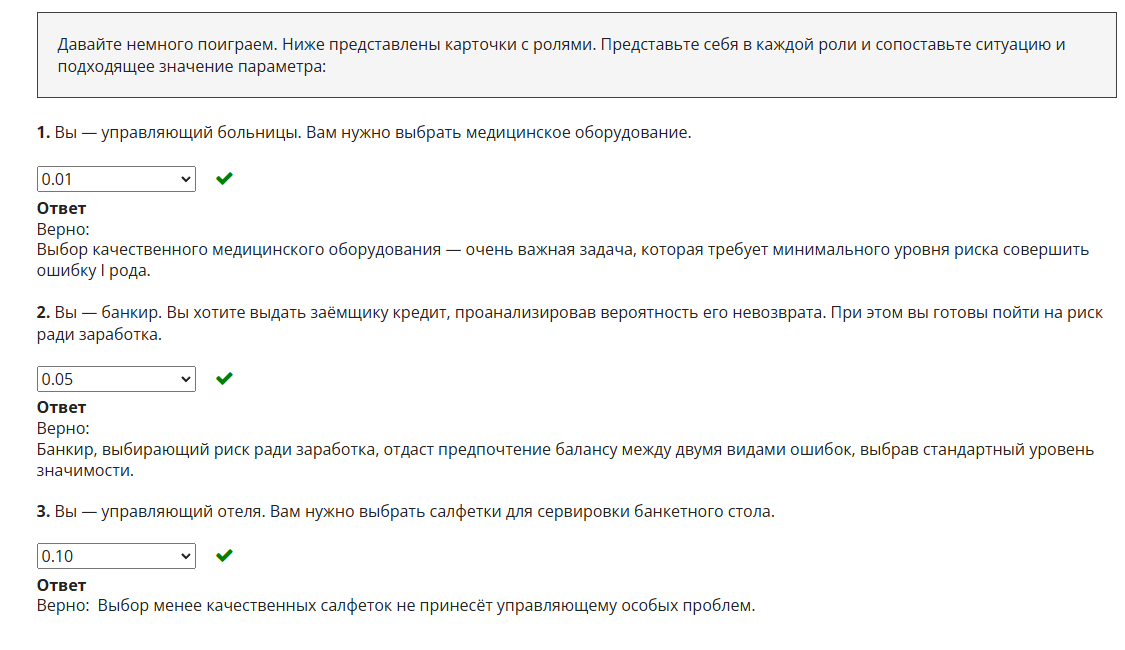